# Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
os.getcwd()

'C:\\Users\\Indu'

In [3]:
import os
os.chdir(r'C:\Users\Indu\Machine Learning')

In [4]:
os.getcwd()

'C:\\Users\\Indu\\Machine Learning'

In [5]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [6]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [7]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# no. of duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df.shape

Number of duplicate rows = 0


(1525, 10)

In [10]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [11]:
df[dups]

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Univariate Analysis

Text(0.5, 1.0, 'Age_boxplot')

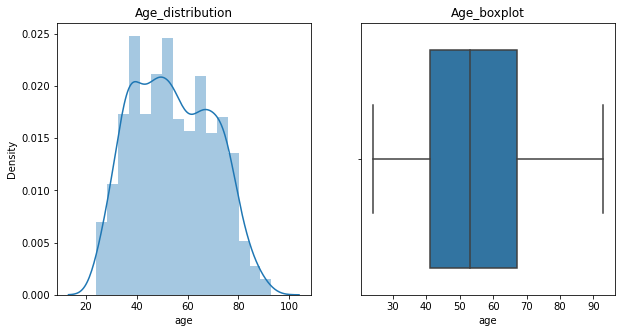

In [12]:
# plot the graph for Age variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Age_distribution')
sns.distplot(df['age'])

plt.subplot(1,2,2)
sns.boxplot(df['age'])
plt.title('Age_boxplot')

Text(0.5, 1.0, 'Economic Condition national boxplot')

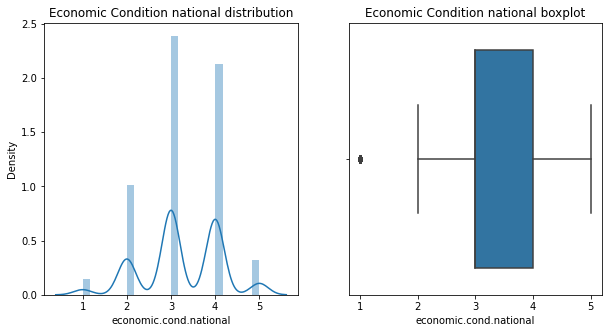

In [13]:
# plot the graph for Economic Condition national variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Economic Condition national distribution')
sns.distplot(df['economic.cond.national'])

plt.subplot(1,2,2)
sns.boxplot(df['economic.cond.national'])
plt.title('Economic Condition national boxplot')

Text(0.5, 1.0, 'Economic Condition national boxplot')

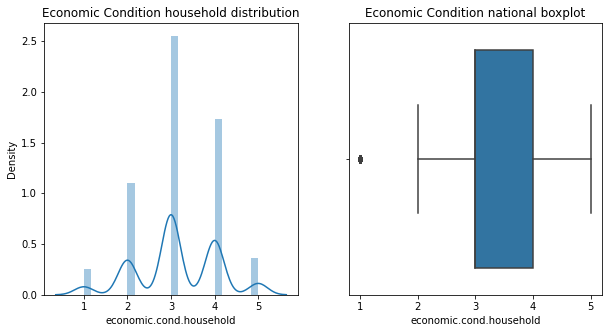

In [14]:
# plot the graph for Economic Condition household variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Economic Condition household distribution')
sns.distplot(df['economic.cond.household'])

plt.subplot(1,2,2)
sns.boxplot(df['economic.cond.household'])
plt.title('Economic Condition national boxplot')

Text(0.5, 1.0, 'Blair boxplot')

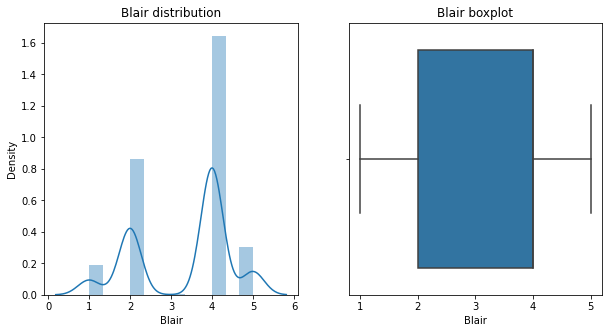

In [15]:
# plot the graph for Blair variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Blair distribution')
sns.distplot(df['Blair'])

plt.subplot(1,2,2)
sns.boxplot(df['Blair'])
plt.title('Blair boxplot')

Text(0.5, 1.0, 'Hague boxplot')

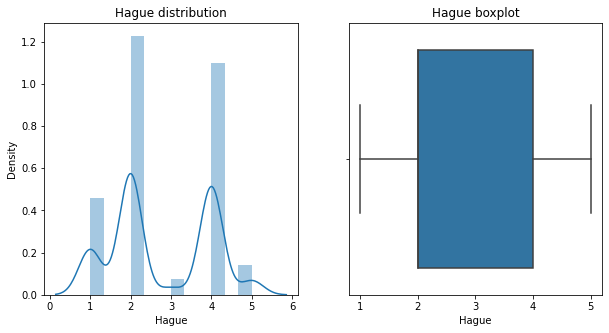

In [16]:
# plot the graph for Hauge variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Hague distribution')
sns.distplot(df['Hague'])

plt.subplot(1,2,2)
sns.boxplot(df['Hague'])
plt.title('Hague boxplot')

Text(0.5, 1.0, 'Europe boxplot')

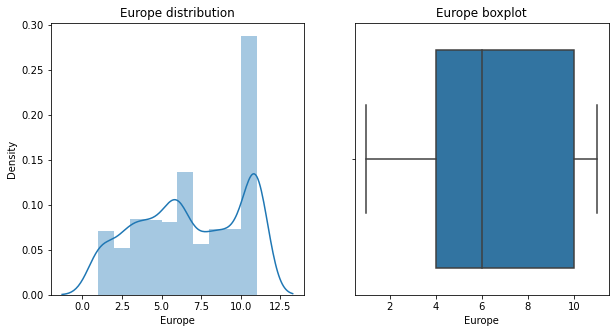

In [17]:
# plot the graph for Europe variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Europe distribution')
sns.distplot(df['Europe'])

plt.subplot(1,2,2)
sns.boxplot(df['Europe'])
plt.title('Europe boxplot')

Text(0.5, 1.0, 'political knowledge boxplot')

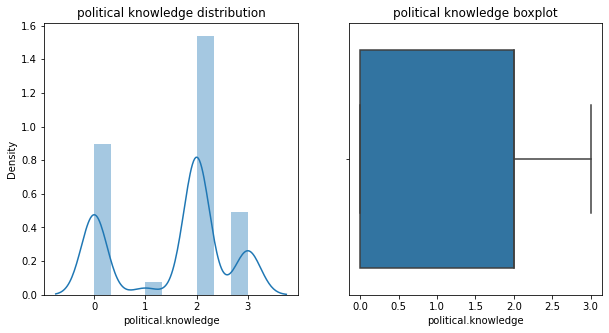

In [18]:
# plot the graph for political knowledge variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('political knowledge distribution')
sns.distplot(df['political.knowledge'])

plt.subplot(1,2,2)
sns.boxplot(df['political.knowledge'])
plt.title('political knowledge boxplot')

In [19]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

Bivariate Analysis

<AxesSubplot:xlabel='Europe', ylabel='age'>

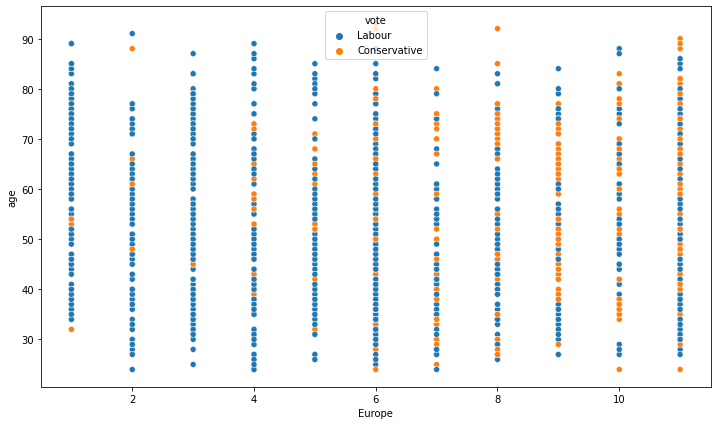

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Europe',y='age',hue='vote',data=df)

<AxesSubplot:xlabel='vote', ylabel='age'>

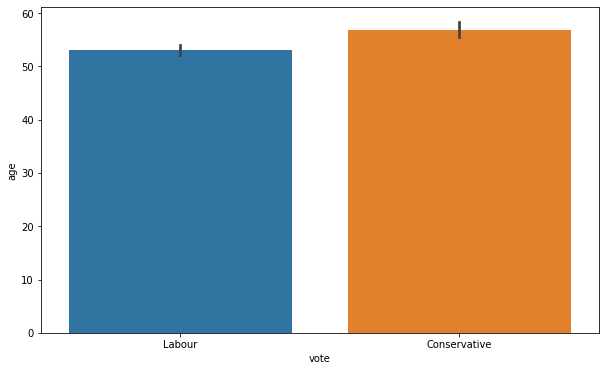

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='vote',y='age',data=df)

<AxesSubplot:xlabel='vote', ylabel='economic.cond.national'>

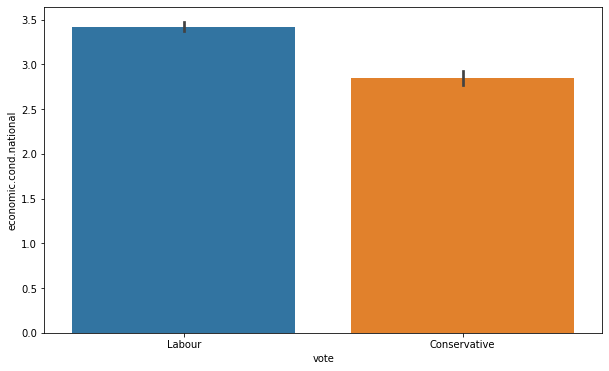

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='vote',y='economic.cond.national',data=df)

<AxesSubplot:xlabel='vote', ylabel='count'>

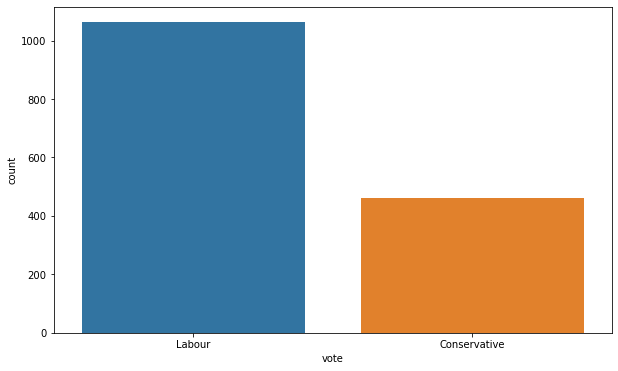

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='vote',data=df)

In [24]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

<AxesSubplot:xlabel='Europe', ylabel='age'>

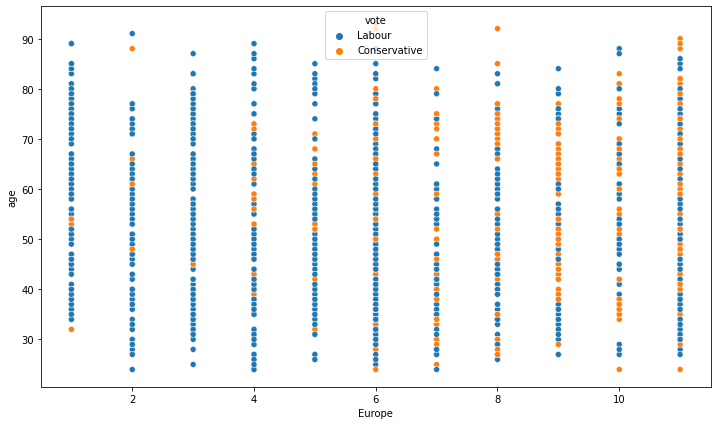

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Europe',y='age',hue='vote',data=df)

<AxesSubplot:xlabel='Blair', ylabel='vote'>

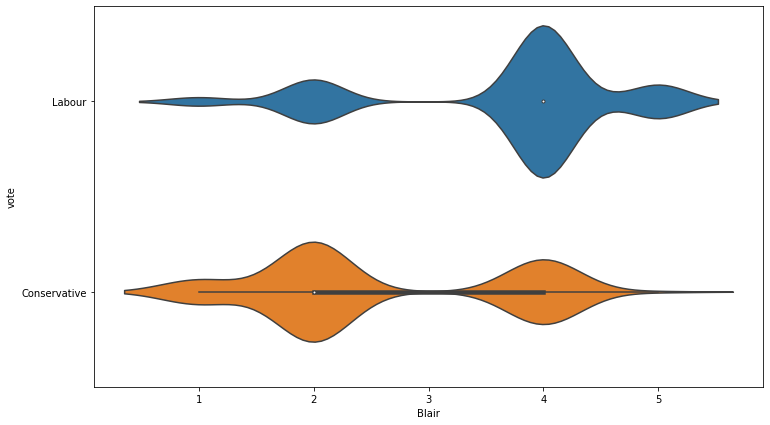

In [26]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Blair',y='vote',data=df)

<AxesSubplot:xlabel='Hague', ylabel='vote'>

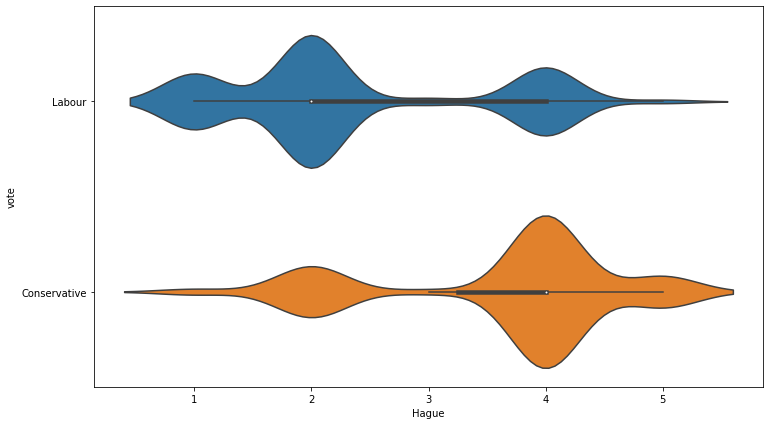

In [27]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Hague',y='vote',data=df)

<AxesSubplot:xlabel='gender', ylabel='political.knowledge'>

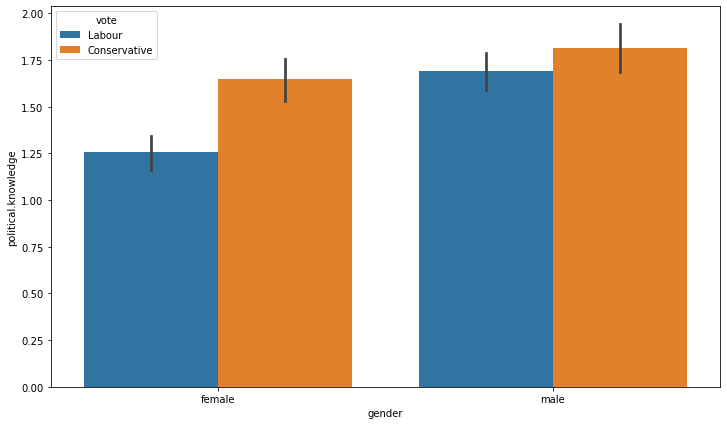

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(y='political.knowledge',x='gender',hue='vote',data=df)

<Figure size 864x504 with 0 Axes>

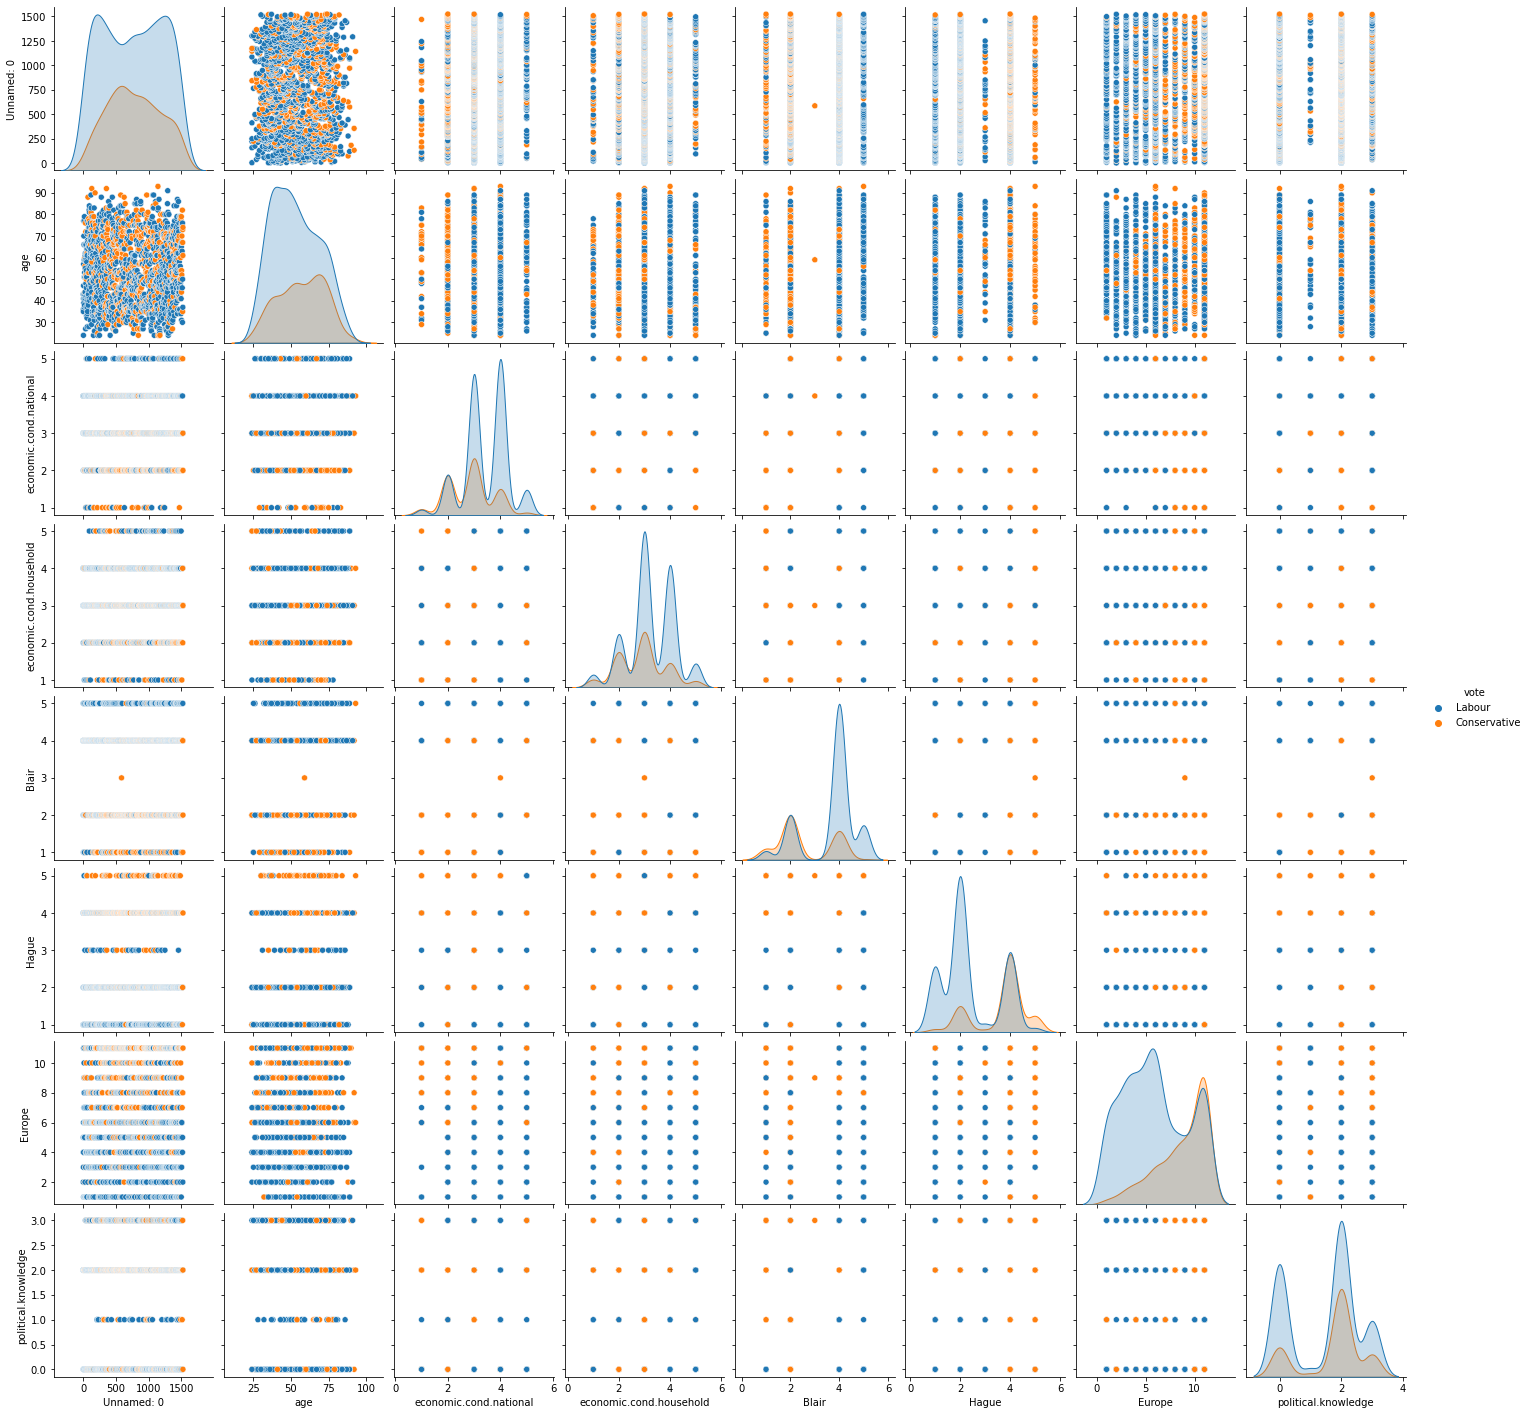

In [29]:
plt.figure(figsize=(12,7))
sns.pairplot(hue='vote',data=df)

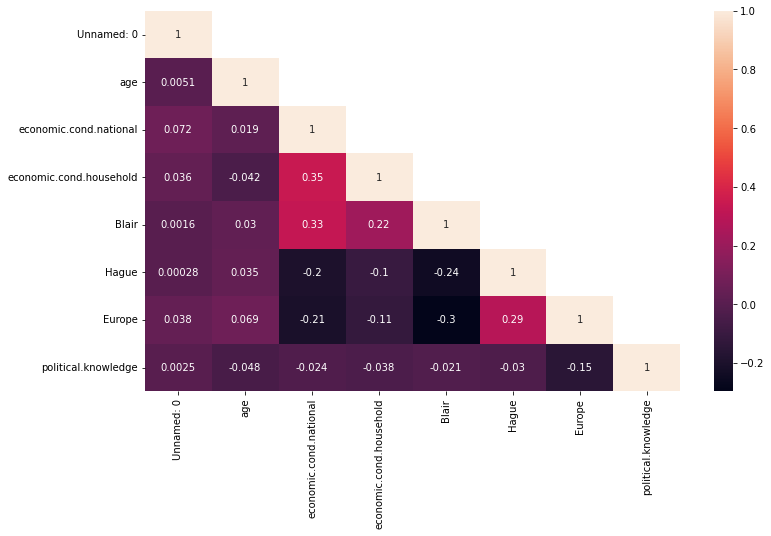

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

Data Preparation:
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [31]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [32]:
df_data=pd.get_dummies(data=df, drop_first=True)


Data Split:
Split the data into train and test (70:30).
VIF Calculation

In [33]:
df_data.columns

Index(['Unnamed: 0', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [34]:
import statsmodels.formula.api as sm


In [35]:
def vif_cal(Z):
    x_var =Z
    xvar_names = Z.columns
    vif = pd.DataFrame()
    for i in range(0, xvar_names.shape[0]):
        y=x_var[xvar_names[i]]
        x = x_var[xvar_names.drop(xvar_names[i])]
        rsq =sm.ols(formula ="y~x", data =x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ' , vif)

In [36]:
vif_cal(Z= df_data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male']])

age VIF =  1.03
economic.cond.national VIF =  1.28
economic.cond.household VIF =  1.16
Blair VIF =  1.34
Hague VIF =  1.32
Europe VIF =  1.28
political.knowledge VIF =  1.09
vote_Labour VIF =  1.67
gender_male VIF =  1.03


In [37]:
# Train Test Split
# Copy all the predictor variables into X dataframe
X = df_data.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = df_data['vote_Labour']

In [38]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [39]:
y_train.value_counts(1)

1    0.697282
0    0.302718
Name: vote_Labour, dtype: float64

In [40]:
y_test.value_counts(1)

1    0.696507
0    0.303493
Name: vote_Labour, dtype: float64

In [41]:
# df_data=df_data.drop('Unnamed: 0',axis=1)

In [42]:
df_data.shape

(1525, 10)

In [43]:
X.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,2,36,4,4,4,4,5,2,1
2,3,35,4,4,5,2,3,2,1
3,4,24,4,2,2,1,4,0,0
4,5,41,2,2,1,1,6,2,1


1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
     Apply Logistic Regression

In [44]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [45]:
# Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [46]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.244205,0.755795
1,0.077634,0.922366
2,0.060125,0.939875
3,0.233158,0.766842
4,0.022498,0.977502


In [47]:
# Accuracy - Training Data : lr_train_acc
lr_train_acc=model.score(X_train, y_train)
lr_train_acc

0.8294283036551078

AUC: 0.877


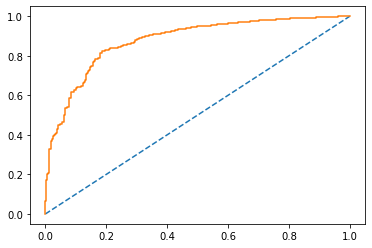

In [48]:
# AUC and ROC for the training data : lr_train_auc
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' %lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [49]:
# Accuracy - Test Data : lr_test_acc
lr_test_acc=model.score(X_test, y_test)
lr_test_acc

0.8449781659388647

AUC: 0.914


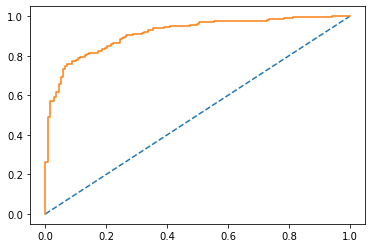

In [50]:
# AUC and ROC for the test data : lr_test_auc
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[213, 110],
       [ 72, 672]], dtype=int64)

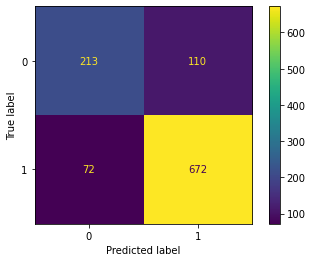

In [52]:
plot_confusion_matrix(model,X_train,y_train);

In [53]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [54]:
# Logistic Regression Metrics Training Data
lr_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics_train).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.86
lr_train_recall  0.9
lr_train_f1  0.88


In [55]:
# Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[ 92,  47],
       [ 24, 295]], dtype=int64)

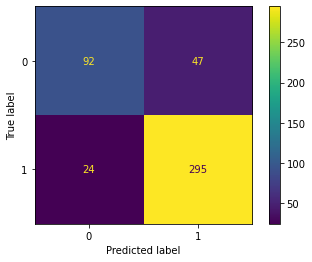

In [56]:
plot_confusion_matrix(model,X_test,y_test);

In [57]:
# Test Data Classification report for Logistic Regression
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.79      0.81       458
weighted avg       0.84      0.84      0.84       458



In [58]:
# Logistic Regression Test data Metrics
lr_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics_test).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.86
lr_test_recall  0.92
lr_test_f1  0.89


Apply Linear Discriminant Analysis

In [59]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [60]:
# Prediction
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

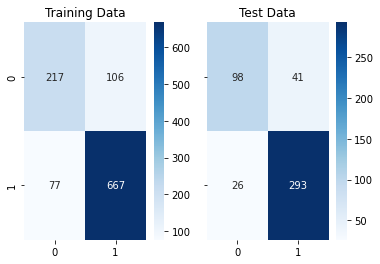

In [61]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [62]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.71      0.75       139
           1       0.88      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



In [63]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(X_test)

In [64]:
pred_prob_train[:,1]

array([0.92158325, 0.7899835 , 0.95769897, ..., 0.93441968, 0.78043418,
       0.80206966])

AUC for the Training Data: 0.877
AUC for the Test Data: 0.916


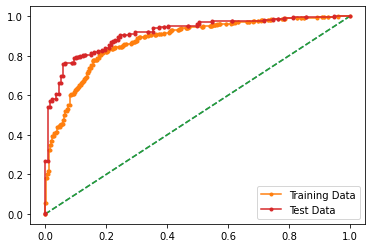

In [65]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [66]:
# Accuracy - Train Data : lda_train_acc
lda_train_acc=model.score(X_train, y_train)
lda_train_acc

0.8284910965323337

In [67]:
# Accuracy - Test Data : lda_test_acc
lda_test_acc=model.score(X_test, y_test)
lda_test_acc

0.8537117903930131

In [68]:
# LDA Metrics Training Data
lda_metrics_train=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.86
lda_train_recall  0.9
lda_train_f1  0.88


In [69]:
# LDA Metrics Test Data
lda_metrics_train=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics_train).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.88
lda_test_recall  0.92
lda_test_f1  0.9


In [70]:
print(lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1,lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1)


0.8294283036551078 0.8770473384600019 0.9 0.86 0.88 0.8449781659388647 0.9143230869849575 0.92 0.86 0.89


In [71]:
lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1,lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1


(0.8284910965323337,
 0.8769474682912215,
 0.9,
 0.86,
 0.88,
 0.8537117903930131,
 0.9159468663313862,
 0.92,
 0.88,
 0.9)

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

KNN Model

In [72]:
df_data.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,1,43,3,3,4,1,2,2,1,0
1,2,36,4,4,4,4,5,2,1,1
2,3,35,4,4,5,2,3,2,1,1
3,4,24,4,2,2,1,4,0,1,0
4,5,41,2,2,1,1,6,2,1,1


In [73]:
from scipy.stats import zscore

In [74]:
X.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,2,36,4,4,4,4,5,2,1
2,3,35,4,4,5,2,3,2,1
3,4,24,4,2,2,1,4,0,0
4,5,41,2,2,1,1,6,2,1


In [75]:
# X=X.drop('Unnamed: 0',axis=1)

In [76]:
x=X.copy()


In [77]:
X.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,2,36,4,4,4,4,5,2,1
2,3,35,4,4,5,2,3,2,1
3,4,24,4,2,2,1,4,0,0
4,5,41,2,2,1,1,6,2,1


In [78]:
Y=y.copy()

In [79]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']].apply(zscore)


In [80]:
x.head()


,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,2,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,3,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,4,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,5,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [81]:
x.shape

(1525, 9)

In [82]:
Y.shape

(1525,)

In [83]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y, random_state=1)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.799650043744532
[[187 164]
 [ 65 727]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       351
           1       0.82      0.92      0.86       792

    accuracy                           0.80      1143
   macro avg       0.78      0.73      0.74      1143
weighted avg       0.79      0.80      0.79      1143



In [86]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6780104712041884
[[ 34  77]
 [ 46 225]]
              precision    recall  f1-score   support

           0       0.42      0.31      0.36       111
           1       0.75      0.83      0.79       271

    accuracy                           0.68       382
   macro avg       0.59      0.57      0.57       382
weighted avg       0.65      0.68      0.66       382



In [87]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(x_test)

In [88]:
pred_prob_train[:,1]

array([0.86860485, 0.99536885, 0.54636728, ..., 0.9658303 , 0.99332974,
       0.90554534])

In [89]:
# y_train

AUC for the Training Data: 0.876
AUC for the Test Data: 0.888


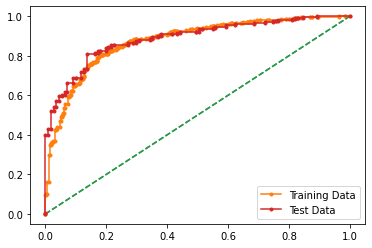

In [90]:
# AUC and ROC for the training data

# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %knn_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
knn_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %knn_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

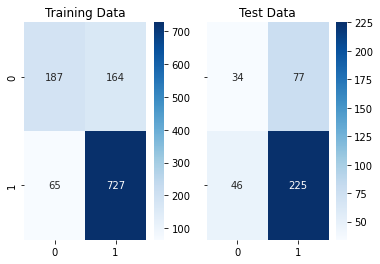

In [91]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [92]:
# Accuracy - Train Data : knn_train_acc
knn_train_acc=KNN_model.score(x_train, y_train)
knn_train_acc

0.799650043744532

In [93]:
# Accuracy - Test Data : knn_test_acc
knn_test_acc=model.score(x_test, y_test)
knn_test_acc

0.7120418848167539

In [94]:
# KNN Metrics Training Data
knn_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_metrics_train).transpose()
knn_train_f1=round(df.loc["1"][2],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_precision=round(df.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.82
knn_train_recall  0.92
knn_train_f1  0.86


In [95]:
# KNN Metrics Test Data
knn_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_metrics_test).transpose()
knn_test_f1=round(df.loc["1"][2],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_precision=round(df.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.75
knn_test_recall  0.83
knn_test_f1  0.79


In [96]:
knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1,knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1


(0.799650043744532,
 0.8759964315519871,
 0.92,
 0.82,
 0.86,
 0.7120418848167539,
 0.8884013164455968,
 0.83,
 0.75,
 0.79)

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [98]:
X.shape

(1525, 9)

In [99]:
y.shape

(1525,)

In [100]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [101]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [102]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8266166822867854
[[226  97]
 [ 88 656]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       323
           1       0.87      0.88      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [103]:
y_test.value_counts()

1    319
0    139
Name: vote_Labour, dtype: int64

In [104]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8493449781659389
[[102  37]
 [ 32 287]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       139
           1       0.89      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458



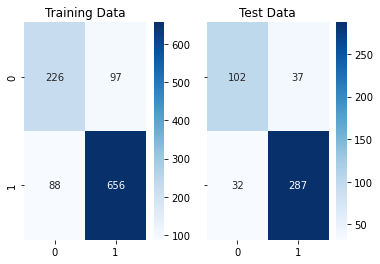

In [105]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [106]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(X_test)

In [107]:
pred_prob_train[:,1]

array([0.92158325, 0.7899835 , 0.95769897, ..., 0.93441968, 0.78043418,
       0.80206966])

In [108]:
y_train.shape

(1067,)

In [109]:
y_test.shape

(458,)

In [110]:
pred_prob_train[:,1].shape

(1067,)

In [111]:
pred_prob_test[:,1].shape

(458,)

AUC for the Training Data: 0.877
AUC for the Test Data: 0.916


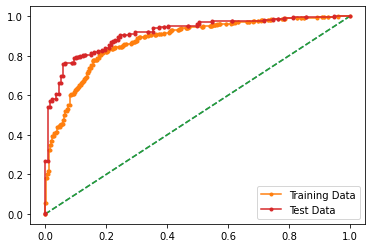

In [112]:
# AUC and ROC for the training data

# calculate AUC
NB_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %NB_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
NB_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %NB_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [113]:
# Accuracy - Train Data : NB_train_acc
nb_train_acc=NB_model.score(X_train, y_train)
nb_train_acc

0.8266166822867854

In [114]:
# Accuracy - Test Data : nb_test_acc
nb_test_acc=NB_model.score(X_test, y_test)
nb_test_acc

0.8493449781659389

In [115]:
# NB Metrics Training Data
nb_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nb_metrics_train).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_precision  0.87
nb_train_recall  0.88
nb_train_f1  0.88


In [116]:
# NB Metrics Test Data
nb_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics_test).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_precision  0.89
nb_test_recall  0.9
nb_test_f1  0.89


In [117]:
nb_train_acc,NB_train_auc,nb_train_recall,nb_train_precision,nb_train_f1,nb_test_acc,NB_test_auc,nb_test_recall,nb_test_precision,nb_test_f1


(0.8266166822867854,
 0.8769474682912215,
 0.88,
 0.87,
 0.88,
 0.8493449781659389,
 0.9159468663313862,
 0.9,
 0.89,
 0.89)

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
Random forest


In [118]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [119]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [120]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[323   0]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [121]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8427947598253275
[[ 93  46]
 [ 26 293]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.81       458
weighted avg       0.84      0.84      0.84       458



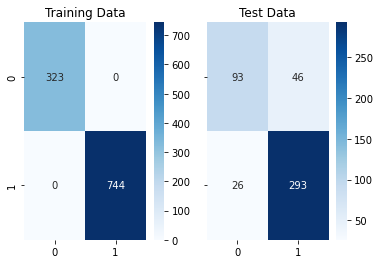

In [122]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [123]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(X_test)

In [124]:
pred_prob_train[:,1]

array([0.92158325, 0.7899835 , 0.95769897, ..., 0.93441968, 0.78043418,
       0.80206966])

In [125]:
pred_prob_test[:,1]

array([0.7823544 , 0.94632742, 0.94944872, 0.77811223, 0.98345208,
       0.95949953, 0.86961307, 0.97441426, 0.9760469 , 0.50887432,
       0.03060618, 0.9838102 , 0.90853463, 0.99263372, 0.50040216,
       0.62867804, 0.96539263, 0.98897064, 0.97027945, 0.82783434,
       0.96641303, 0.02087251, 0.94420625, 0.97241951, 0.03222537,
       0.95812734, 0.97942648, 0.69297028, 0.19078665, 0.09538654,
       0.98622545, 0.95437448, 0.37585964, 0.98181713, 0.76137637,
       0.9604389 , 0.98675702, 0.86489006, 0.12849273, 0.78648255,
       0.03729634, 0.96522299, 0.75782072, 0.75139612, 0.92327945,
       0.15377433, 0.40357204, 0.85399127, 0.69897864, 0.92721463,
       0.6071787 , 0.28016139, 0.04096418, 0.162692  , 0.78899057,
       0.54932932, 0.96302518, 0.25925528, 0.94353361, 0.88208317,
       0.83736828, 0.94388037, 0.18094644, 0.49290438, 0.95885528,
       0.79251988, 0.98129665, 0.99067171, 0.83670927, 0.11190767,
       0.87582856, 0.2734959 , 0.53817649, 0.39848727, 0.93073

AUC for the Training Data: 0.877
AUC for the Test Data: 0.916


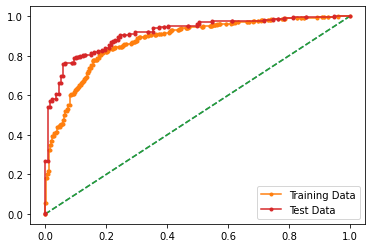

In [126]:
# AUC and ROC for the training data

# calculate AUC
rf_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [127]:
# Accuracy - Train Data : NB_train_acc
rf_train_acc=RF_model.score(X_train, y_train)
rf_train_acc

1.0

In [128]:
# Accuracy - Test Data : knn_train_acc
rf_test_acc=RF_model.score(X_test, y_test)
rf_test_acc

0.8427947598253275

In [129]:
# Random Forest Metrics Training Data
rf_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_metrics_train).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


In [130]:
# Random Forest Metrics Test Data
rf_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_metrics_test).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.86
rf_test_recall  0.92
rf_test_f1  0.89


In [131]:
rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1,rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1


(1.0,
 0.8769474682912215,
 1.0,
 1.0,
 1.0,
 0.8427947598253275,
 0.9159468663313862,
 0.92,
 0.86,
 0.89)

Bagging

In [132]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [133]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [134]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.971883786316776
[[301  22]
 [  8 736]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       323
           1       0.97      0.99      0.98       744

    accuracy                           0.97      1067
   macro avg       0.97      0.96      0.97      1067
weighted avg       0.97      0.97      0.97      1067



In [135]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8449781659388647
[[ 92  47]
 [ 24 295]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.79      0.81       458
weighted avg       0.84      0.84      0.84       458



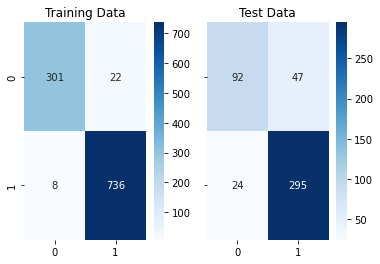

In [136]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [137]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= Bagging_model.predict_proba(X_test)

AUC for the Training Data: 0.998
AUC for the Test Data: 0.910


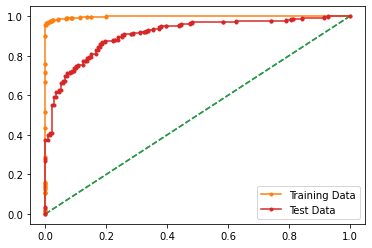

In [138]:
# AUC and ROC for the training data

# calculate AUC
bag_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %bag_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
bag_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %bag_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Ada Boost

In [139]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [140]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8650421743205249
[[239  84]
 [ 60 684]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       323
           1       0.89      0.92      0.90       744

    accuracy                           0.87      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [141]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8056768558951966
[[ 89  50]
 [ 39 280]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       139
           1       0.85      0.88      0.86       319

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.80      0.81      0.80       458



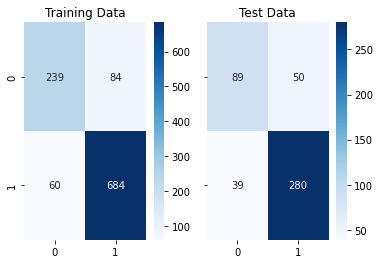

In [142]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [143]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.929
AUC for the Test Data: 0.886


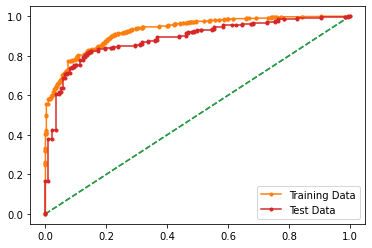

In [144]:
# AUC and ROC for the training data

# calculate AUC
adb_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %adb_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
adb_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %adb_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [145]:
# Accuracy - Train Data : NB_train_acc
adb_train_acc=ADB_model.score(X_train, y_train)
adb_train_acc

0.8650421743205249

In [146]:
# Accuracy - Test Data : knn_train_acc
adb_test_acc=ADB_model.score(X_test, y_test)
adb_test_acc

0.8056768558951966

In [147]:
# Ada Boost Metrics Training Data
adb_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_metrics_train).transpose()
adb_train_f1=round(df.loc["1"][2],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_precision=round(df.loc["1"][0],2)
print ('Predict 1:adb_train_precision ',adb_train_precision)
print ('Predict 1:adb_train_recall ',adb_train_recall)
print ('Predict 1:adb_train_f1 ',adb_train_f1)

Predict 1:adb_train_precision  0.89
Predict 1:adb_train_recall  0.92
Predict 1:adb_train_f1  0.9


In [148]:
adb_train_f1_0=round(df.loc["0"][2],2)
adb_train_recall_0=round(df.loc["0"][1],2)
adb_train_precision_0=round(df.loc["0"][0],2)
print ('Predict 0:adb_train_precision ',adb_train_precision_0)
print ('Predict 0:adb_train_recall ',adb_train_recall_0)
print ('Predict 0:adb_train_f1 ',adb_train_f1_0)

Predict 0:adb_train_precision  0.8
Predict 0:adb_train_recall  0.74
Predict 0:adb_train_f1  0.77


In [149]:
# Ada Boost Metrics Test Data
adb_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics_test).transpose()
adb_test_f1=round(df.loc["1"][2],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_precision=round(df.loc["1"][0],2)
print ('Predict 1:adb_test_precision ',adb_test_precision)
print ('Predict 1:adb_test_recall ',adb_test_recall)
print ('Predict 1:adb_test_f1 ',adb_test_f1)

Predict 1:adb_test_precision  0.85
Predict 1:adb_test_recall  0.88
Predict 1:adb_test_f1  0.86


In [150]:
# Ada Boost Metrics Test Data
adb_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics_test).transpose()
adb_test_f1_0=round(df.loc["0"][2],2)
adb_test_recall_0=round(df.loc["0"][1],2)
adb_test_precision_0=round(df.loc["0"][0],2)
print ('Predict 0:adb_test_precision ',adb_test_precision_0)
print ('Predict 0:adb_test_recall ',adb_test_recall_0)
print ('Predict 0:adb_test_f1 ',adb_test_f1_0)

Predict 0:adb_test_precision  0.7
Predict 0:adb_test_recall  0.64
Predict 0:adb_test_f1  0.67


In [151]:
adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1,adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1


(0.8650421743205249,
 0.9287093445187923,
 0.92,
 0.89,
 0.9,
 0.8056768558951966,
 0.8863805507318283,
 0.88,
 0.85,
 0.86)

1.7.2 Final Model: Compare all the model and write an inference which model is best/optimized.
Comparison of the performance metrics from the 6 models

In [152]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logit Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'Logit Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Naive Bayes Train':[nb_train_acc,NB_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'Naive Bayes Test':[nb_test_acc,NB_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
         'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
         'Ada Boost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'Ada Boost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'Ada Boost Train_0':[adb_train_acc,adb_train_auc,adb_train_recall_0,adb_train_precision_0,adb_train_f1_0],
        'Ada Boost Test_0':[adb_test_acc,adb_test_auc,adb_test_recall_0,adb_test_precision_0,adb_test_f1_0]
        
                    
                    
                    
                    
                    },index=index)
round(data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,Naive Bayes Train,Naive Bayes Test,RF Train,RF Test,Ada Boost Train,Ada Boost Test,Ada Boost Train_0,Ada Boost Test_0
Accuracy,0.83,0.84,0.83,0.85,0.80,0.71,0.83,0.85,1.00,0.84,0.87,0.81,0.87,0.81
AUC,0.88,0.91,0.88,0.92,0.88,0.89,0.88,0.92,0.88,0.92,0.93,0.89,0.93,0.89
Recall,0.90,0.92,0.90,0.92,0.92,0.83,0.88,0.90,1.00,0.92,0.92,0.88,0.74,0.64
Precision,0.86,0.86,0.86,0.88,0.82,0.75,0.87,0.89,1.00,0.86,0.89,0.85,0.80,0.70
F1 Score,0.88,0.89,0.88,0.90,0.86,0.79,0.88,0.89,1.00,0.89,0.90,0.86,0.77,0.67


Conclusion - 
So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN
SMOTE

In [153]:
from imblearn.over_sampling import SMOTE

SMOTE is only applied on the train data set

In [154]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [155]:
## Let's check the shape after SMOTE
X_train_res.shape

(1488, 9)

In [156]:
y_train_res.value_counts(normalize =True)

1    0.5
0    0.5
Name: vote_Labour, dtype: float64

Naive Bayes with SMOTE

In [157]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [158]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [159]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.831989247311828
[[624 120]
 [130 614]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       744
           1       0.84      0.83      0.83       744

    accuracy                           0.83      1488
   macro avg       0.83      0.83      0.83      1488
weighted avg       0.83      0.83      0.83      1488



In [160]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8406113537117904
[[110  29]
 [ 44 275]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       139
           1       0.90      0.86      0.88       319

    accuracy                           0.84       458
   macro avg       0.81      0.83      0.82       458
weighted avg       0.85      0.84      0.84       458



SMOTE dataset - ADA BOOST

In [161]:
ADB_SM_model = AdaBoostClassifier(n_estimators=50, random_state=1, base_estimator = NB_SM_model, learning_rate=0.01)
ADB_SM_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.01,
                   random_state=1)

In [162]:
y_train_predict_res = ADB_SM_model.predict(X_train_res)
model_score = ADB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res,y_train_predict_res))
print(metrics.classification_report(y_train_res,y_train_predict_res))

0.8353494623655914
[[624 120]
 [125 619]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       744
           1       0.84      0.83      0.83       744

    accuracy                           0.84      1488
   macro avg       0.84      0.84      0.84      1488
weighted avg       0.84      0.84      0.84      1488



SMOTE dataset - Logistic Regression

In [163]:
# Fit the Logistic Regression model
lr_sm_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_sm_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [164]:
y_train_predict_res = lr_sm_model.predict(X_train_res)
model_score = lr_sm_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res,y_train_predict_res))
print(metrics.classification_report(y_train_res,y_train_predict_res))

0.8346774193548387
[[628 116]
 [130 614]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       744
           1       0.84      0.83      0.83       744

    accuracy                           0.83      1488
   macro avg       0.83      0.83      0.83      1488
weighted avg       0.83      0.83      0.83      1488



In [165]:
y_test_predict_res = lr_sm_model.predict(X_test)
model_score =lr_sm_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict_res))
print(metrics.classification_report(y_test,y_test_predict_res))

0.834061135371179
[[114  25]
 [ 51 268]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       139
           1       0.91      0.84      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.83      0.81       458
weighted avg       0.85      0.83      0.84       458



For Naive Bayes Model, to improve performance we will use K-fold validation

In [166]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(NB_model,X_train, y_train, cv =10)
print("Cross Validation Score:", scores,scores)
print("Average Score:", np.average(scores))

Cross Validation Score: [0.82242991 0.8317757  0.80373832 0.81308411 0.82242991 0.82242991
 0.81308411 0.87735849 0.81132075 0.83018868] [0.82242991 0.8317757  0.80373832 0.81308411 0.82242991 0.82242991
 0.81308411 0.87735849 0.81132075 0.83018868]
Average Score: 0.8247839887145124


# Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well


Lets check using GRID search, for KNN

In [167]:
params = {'n_neighbors':[2,4,6,8,10,12,14,16,18],
         'algorithm': ['auto','ball_tree','kd_tree','brute'],
         'leaf_size':list(range(1,30)),
         'p':[1,2],
         'metric':['minkowski','euclidean','manhattan','chebyshev', 'mahanalobis']}

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y, random_state=1)

In [169]:
x_train

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1101,1102,0.497751,-0.279218,-0.150948,-1.136225,1.831354,0.385710,-1.424148,1.067169
1083,1084,-0.902983,-0.279218,0.924730,0.566716,-1.419886,-1.131070,1.346038,1.067169
772,773,-0.138946,-1.414704,-0.150948,-1.136225,1.831354,1.295778,0.422643,-0.937059
700,701,-0.457295,-0.279218,-0.150948,0.566716,-0.607076,-0.827714,-1.424148,-0.937059
27,28,-0.202616,-0.279218,-1.226625,0.566716,-0.607076,-1.434426,0.422643,-0.937059
...,...,...,...,...,...,...,...,...,...
715,716,0.816100,0.856268,-0.150948,1.418187,-0.607076,-1.434426,0.422643,1.067169
905,906,-1.730689,1.991754,2.000408,-1.136225,-1.419886,-0.827714,1.346038,1.067169
1096,1097,-1.285001,0.856268,2.000408,0.566716,1.018544,0.082354,0.422643,-0.937059
235,236,-1.157661,0.856268,0.924730,0.566716,-0.607076,0.082354,0.422643,-0.937059


In [ ]:
%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params, refit=True,verbose=1)
grid_knn.fit(x_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 10440 candidates, totalling 52200 fits


In [176]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 8,
 'p': 1}

In [177]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

print("Train Accuracy is :{}".format(accuracy_score(y_train,grid_knn.predict(x_train))))
print("\nTest Accuracy is :{}".format(accuracy_score(y_test,grid_knn.predict(x_test))))

Train Accuracy is :0.8022747156605424

Test Accuracy is :0.7015706806282722


In [178]:
from sklearn.metrics import classification_report
print("Classification report for Train set:")
print(classification_report(y_train,grid_knn.predict(x_train)))

Classification report for Train set:
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       351
           1       0.84      0.89      0.86       792

    accuracy                           0.80      1143
   macro avg       0.77      0.75      0.76      1143
weighted avg       0.80      0.80      0.80      1143



In [179]:
print("Classification report for Test set:")
print(classification_report(y_test,grid_knn.predict(x_test)))

Classification report for Test set:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       111
           1       0.78      0.81      0.79       271

    accuracy                           0.70       382
   macro avg       0.63      0.62      0.63       382
weighted avg       0.69      0.70      0.70       382



Lets check using GRID search, for Logistic Regression and Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])


# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1067, 1143]

In [181]:
best_clf.best_params_

NameError: name 'best_clf' is not defined

In [182]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

print("Train Accuracy is :{}".format(accuracy_score(y_train,best_clf.predict(X_train))))
print("\nTest Accuracy is :{}".format(accuracy_score(y_test,best_clf.predict(X_test))))

NameError: name 'best_clf' is not defined

# 1.8 Based on these predictions, what are the insights?
Summary:
In this Case study we have to decide strategy or plan or we have to predict which party will win election, To which party particular person will vote. What are the deciding factors to win election that we are studying here. Survey is Conducted on 1525 different people, where features like Age, whether person is Eurosceptic with ratings, Assessment to both leaders Hague and Blair. Person is having political Knowledge or not. what is public opinion on Household and national economy, their gender is also taken into consideration, so it seems we have sufficient features to evaluate result.

Steps Performed and Insights:
To predict results, we have started with Exploratory data Analysis where we got some hidden insights by looking at Dataset, by using univariate analysis, Multivariate analysis. Null value, Outlier detection.From EDA we have drawn below mentioned Insights:

Assesment to leader Blair and Economic Household Condition Rating,Economic national Condition rating shows good correlation.

Europscepticism score and Blair Assesment score are inversly related, means if Person is more Eurosceptic there will be less chances he will vote to Blair as a party leader of Labour party.

If person is giving good assesment score to Hague he must be with Conservative party and he or she is Highly Eurosceptic.

It is not always true, but people having good political Knowledge are preferring Europe Integration.

Modelling
As the target variable here is Categorcal i.e Conservative and Labour, we can use Logistic Regression,LDA,KNN,Naive Bayes, RF,Bagging,Boosting.

After all this we have created a Final Classification report where all performance metrics are mentioned.

We have used all mentioned Algorithms. If we check the Target Variable we have almost 70% data of Labour Party and 30 % Conservative Party. We have built all algorithms on this data first, after this we have used SMOTE technique of Oversampling to balance Imbalanced data. We can see in the Classification report that Accuracy, Precision has been dropped.

After all this to do Model tunning we have used Gridsearch CV,K fold cross validation to Improve performance of Existing Base models.

Results:
To get the crystal clear picture, we need more data points to avoid Imbalance data issue. but from this data, we can say that to win the election one must be with vision Europe integration, as this vision has helped labour party.

The Model Logistic Regression has good score and seems to be very stable model in this Scenario.If we predict on Test Data, The labour Party seems to be get Higher number of Votes as compare to Conservative Party. Again the question arises here does this sample represent the whole nation, any bias in the data, like from Particular region data is collected where Labour Party has higher influence. There are less votes to Conservative party,but again it needs more data to predict correct results. But as of now this data tells us that Labour party will win this elections.

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [183]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Indu\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [184]:
## Directories in NLTK
import nltk
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyG

In [185]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Indu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1 . Roosevelt Speech - 1941

In [186]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [187]:
## Reading the first 20 words in speech
print(inaugural.words("1941-Roosevelt.txt")[:20])

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United']


In [188]:
## Reading the First 5 sentences in speech
print(inaugural.sents("1941-Roosevelt.txt")[:5])

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ['In', 'Lincoln', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.'], ['In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.'], ['To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 

In [189]:
## Reading the last line in the speech
print(inaugural.sents("1941-Roosevelt.txt")[-1])

['As', 'Americans', ',', 'we', 'go', 'forward', ',', 'in', 'the', 'service', 'of', 'our', 'country', ',', 'by', 'the', 'will', 'of', 'God', '.']


2.1.1 Find the number of characters, words, and sentences for Roosevelt Speech.

In [190]:
num_chars = len(inaugural.raw("1941-Roosevelt.txt"))
num_words = len(inaugural.words("1941-Roosevelt.txt"))
num_sents = len(inaugural.sents("1941-Roosevelt.txt"))

print(" The numbers of characters in Roosevelt 1941 speech is:",num_chars)
print(" The numbers of words in Roosevelt 1941 speech is:",num_words)
print(" The numbers of sentences in Roosevelt 1941 speech is:",num_sents)

 The numbers of characters in Roosevelt 1941 speech is: 7571
 The numbers of words in Roosevelt 1941 speech is: 1536
 The numbers of sentences in Roosevelt 1941 speech is: 68


Processing the Text Or Cleaning the Document -- Roosvelt Speech

In [191]:
## Converting to Lower Case
raw = inaugural.raw("1941-Roosevelt.txt").lower()
raw

'on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.\n\nin washington\'s day the task of the people was to create and weld together a nation.\n\nin lincoln\'s day the task of the people was to preserve that nation from disruption from within.\n\nin this day the task of the people is to save that nation and its institutions from disruption from without.\n\nto us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction.\n\nlives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.\n\nthere are men who doubt this. there are men who believe that democr

In [192]:
## Cleaning the special characters (/@$: etc)
## from Regular Expressions package
## re.sub() function for string substitution using regular expressions
import re
raw = re.sub("[^a-zA-Z]"," ",str(raw))

In [193]:
## Tokenization -  Splitting the text files into words
tokens = nltk.word_tokenize(raw)
print(tokens)

['on', 'each', 'national', 'day', 'of', 'inauguration', 'since', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'united', 'states', 'in', 'washington', 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', 'in', 'lincoln', 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'nation', 'from', 'disruption', 'from', 'within', 'in', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', 'to', 'us', 'there', 'has', 'come', 'a', 'time', 'in', 'the', 'midst', 'of', 'swift', 'happenings', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', 'if', 'we', 'do', 'not', 'we', 'risk', 'the', 'real', 'peril

2.2.1 : Remove all the stopwords from Speech Franklin D. Roosevelt

In [194]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
## Stop words -  Removing words that are not useful or Removing meaningless words 
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
stopped_tokens = [i for i in tokens if not i in en_stop]

After removing all the stopwords from Speech Franklin D. Roosevelt

In [196]:
Roosvelt_text = stopped_tokens.copy

#function for converting list to string
def convert(lst):
      
    return ' '.join(lst)
      
# lst = Roosvelt_text()
print(convert(Roosvelt_text()))

national day inauguration since people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measured material things vital

In [243]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Indu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [244]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Indu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [246]:
## Stemming Using Lemmatizer -  Stem the words to its root word
from nltk import WordNetLemmatizer
lt = nltk.WordNetLemmatizer()
texts = [lt.lemmatize(i) for i in stopped_tokens]

In [247]:
## Stemming Using Lemmatizer -  Stem the words to its root word
from nltk import WordNetLemmatizer
lt = nltk.WordNetLemmatizer()
texts = [lt.lemmatize(i) for i in stopped_tokens]## Top 10 frequency occuring words
Roosevelt_10 = nltk.FreqDist(texts).most_common(10)
Roosevelt_10

# Word which is used the most
Roosevelt_1 = nltk.FreqDist(texts).most_common(1)
Roosevelt_1

[('nation', 15)]

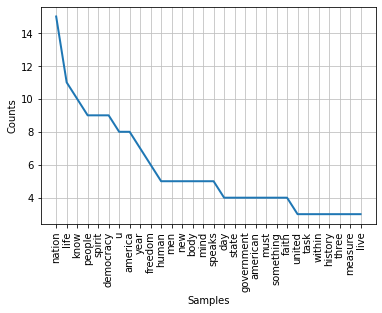

In [248]:
## Plotting the top 30 words occuring frequently
nltk.FreqDist(texts).plot(30);

Dispersion Plot

Lexical dispersion is a measure of how frequently a word appears across the parts of a corpus.



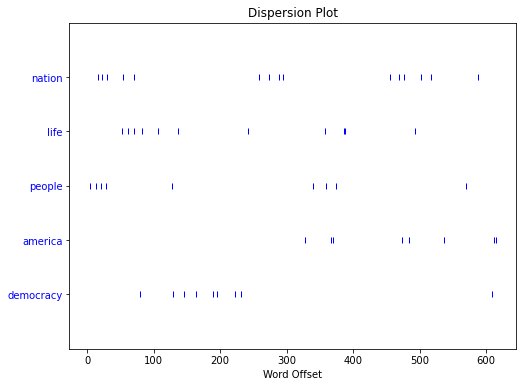

In [249]:
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot
plt.figure(figsize=(8, 6))
words_used=["nation","life","people", "america",'democracy']
dispersion_plot(texts, words_used, ignore_case=True, title='Dispersion Plot')

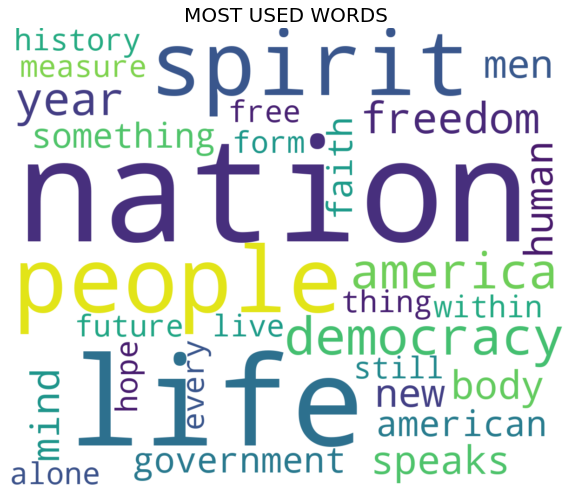

In [250]:
## Creating WordCloud
from wordcloud import WordCloud, STOPWORDS

new_words = set(STOPWORDS)
new_words.update(['u','know', 'must','three'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',max_words=30,
                            width=1200,stopwords=new_words,
                            height=1000).generate(" ".join(texts))

plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Kennedy Speech-1961

In [251]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [252]:
## Reading the first 20 words in speech
print(inaugural.words("1961-Kennedy.txt")[:20])

['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',']


In [253]:
## Reading the First 5 sentences in speech
print(inaugural.sents("1961-Kennedy.txt")[:5])

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ['The', 'world', 'is', 'very', 'different', 'now', '.'], ['For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.'], ['And', 'yet', 'the', 'same', 

In [254]:
## Reading the last line in the speech
print(inaugural.sents("1961-Kennedy.txt")[-1])

['With', 'a', 'good', 'conscience', 'our', 'only', 'sure', 'reward', ',', 'with', 'history', 'the', 'final', 'judge', 'of', 'our', 'deeds', ',', 'let', 'us', 'go', 'forth', 'to', 'lead', 'the', 'land', 'we', 'love', ',', 'asking', 'His', 'blessing', 'and', 'His', 'help', ',', 'but', 'knowing', 'that', 'here', 'on', 'earth', 'God', "'", 's', 'work', 'must', 'truly', 'be', 'our', 'own', '.']


2.1.2 : Number of characters, words, and sentences for John F. Kennedy

In [255]:
num_chars = len(inaugural.raw("1961-Kennedy.txt"))
num_words = len(inaugural.words("1961-Kennedy.txt"))
num_sents = len(inaugural.sents("1961-Kennedy.txt"))

print(" The numbers of characters in 1961-Kennedy speech is:",num_chars)
print(" The numbers of words in 1961-Kennedy speech is:",num_words)
print(" The numbers of sentences in 1961-Kennedy speech is:",num_sents)

 The numbers of characters in 1961-Kennedy speech is: 7618
 The numbers of words in 1961-Kennedy speech is: 1546
 The numbers of sentences in 1961-Kennedy speech is: 52


Processing the Text Or Cleaning the Document

In [256]:
## Converting to Lower Case
raw2 = inaugural.raw("1961-Kennedy.txt").lower()
raw2

'vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nthe world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god.\n\nwe dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [257]:
## Cleaning the special characters (/@$: etc)
## from Regular Expressions package
## re.sub() function for string substitution using regular expressions
import re
raw2 = re.sub("[^a-zA-Z]"," ",str(raw2))

In [258]:
## Tokenization -  Splitting the text files into words
tokens2 = nltk.word_tokenize(raw2)
print(tokens2)

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', 'but', 'a', 'celebration', 'of', 'freedom', 'symbolizing', 'an', 'end', 'as', 'well', 'as', 'a', 'beginning', 'signifying', 'renewal', 'as', 'well', 'as', 'change', 'for', 'i', 'have', 'sworn', 'i', 'before', 'you', 'and', 'almighty', 'god', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', 'the', 'world', 'is', 'very', 'different', 'now', 'for', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', 'and', 'yet', 'the', 'same', 'revolutionary', 'beliefs', 'for', 'which', 'our', 'forebears', 'fought', 'are', 'still', 'at', 'issue', '

2.2.2 : Remove all the stopwords from Speech John F. Kennedy

In [259]:
## Stop words -  Removing words that are not useful or Removing meaningless words 
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
stopped_tokens2 = [i for i in tokens2 if not i in en_stop]

In [260]:
kennedy_text = stopped_tokens2.copy
lst2 = kennedy_text()
print(convert(lst2))

vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival s

2.3.2 : Word occurs the most in speech John F. Kennedy

In [261]:
## Stemming Using Lemmatizer -  Stem the words to its root word
from nltk import WordNetLemmatizer
lt = nltk.WordNetLemmatizer()
texts2 = [lt.lemmatize(i) for i in stopped_tokens]## Top 10 frequency occuring words
Kennedy_10 = nltk.FreqDist(texts2).most_common(10)
Kennedy_10
Kennedy_1 = nltk.FreqDist(texts2).most_common(1)
Kennedy_1

[('nation', 15)]

In [262]:
print('The word which is Occurred most in John F. Kennedy Speech is let')


The word which is Occurred most in John F. Kennedy Speech is let


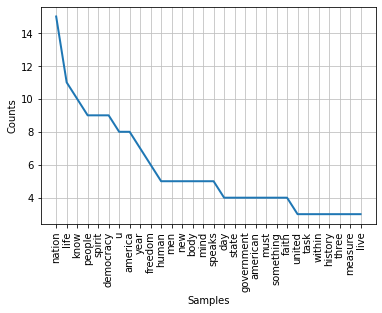

In [263]:
    ## Plotting the top 30 words occuring frequently
nltk.FreqDist(texts2).plot(30);

    Dispersion plot

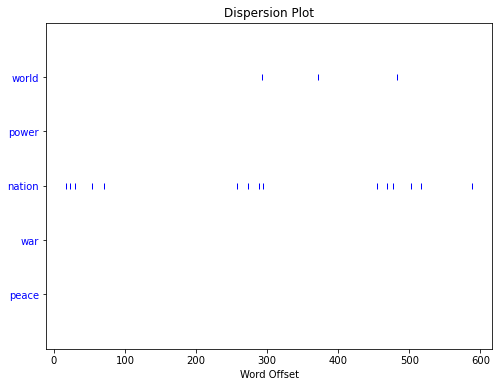

In [264]:
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot
plt.figure(figsize=(8, 6))
words_used2=["world","power","nation", "war",'peace']
dispersion_plot(texts2, words_used2, ignore_case=True, title='Dispersion Plot')

Creating a WordCloud

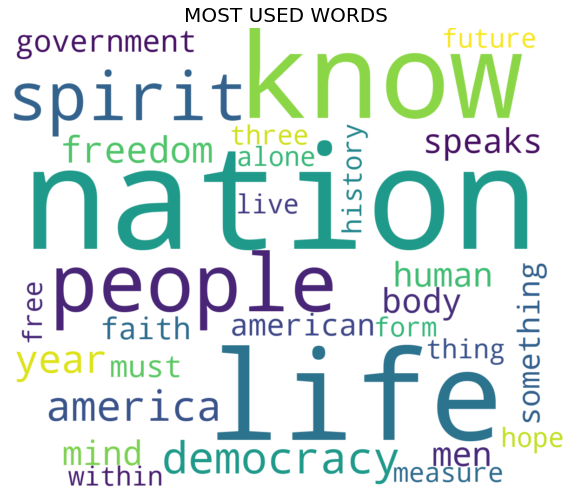

In [265]:
## Creating WordCloud
from wordcloud import WordCloud, STOPWORDS

new_words2 = set(STOPWORDS)
new_words2.update(['u','let', 'side','new','shall','ask','man','first'])

plt.subplots(figsize=(10,10))
wordcloud2 = WordCloud(background_color='white',max_words=30,
                            width=1200,stopwords=new_words2,
                            height=1000).generate(" ".join(texts2))

plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

Richard Nixon - 1973

In [266]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [267]:
## Reading the first 20 words in speech
print(inaugural.words("1973-Nixon.txt")[:20])

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower']


In [268]:
## Reading the First 5 sentences in speech
print(inaugural.sents("1973-Nixon.txt")[:5])

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ['As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.'], ['The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?'], ['Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', '

In [269]:
## Reading the last line in the speech
print(inaugural.sents("1973-Nixon.txt")[-1])

['Let', 'us', 'go', 'forward', 'from', 'here', 'confident', 'in', 'hope', ',', 'strong', 'in', 'our', 'faith', 'in', 'one', 'another', ',', 'sustained', 'by', 'our', 'faith', 'in', 'God', 'who', 'created', 'us', ',', 'and', 'striving', 'always', 'to', 'serve', 'His', 'purpose', '.']


    2.1.3 : Number of characters, words, and sentences for Richard Nixon

In [270]:
num_chars = len(inaugural.raw("1973-Nixon.txt"))
num_words = len(inaugural.words("1973-Nixon.txt"))
num_sents = len(inaugural.sents("1973-Nixon.txt"))

print(" The numbers of characters in 1973-Nixon speech is:",num_chars)
print(" The numbers of words in 1973-Nixon speech is:",num_words)
print(" The numbers of sentences in 1973-Nixon speech is:",num_sents)

 The numbers of characters in 1973-Nixon speech is: 9991
 The numbers of words in 1973-Nixon speech is: 2028
 The numbers of sentences in 1973-Nixon speech is: 69


Processing the Text Or Cleaning the Document

In [271]:
## Converting to Lower Case
raw3 = inaugural.raw("1973-Nixon.txt").lower()
raw3

'mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together:\n\nwhen we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nas we meet here today, we stand on the threshold of a new era of peace in the world.\n\nthe central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nlet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation.\n\nthis past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional

In [272]:
## Cleaning the special characters (/@$: etc)
## from Regular Expressions package
## re.sub() function for string substitution using regular expressions
## ^ is except
import re
raw3 = re.sub("[^a-zA-Z]"," ",str(raw3))

In [273]:
## Tokenization -  Splitting the text files into words
tokens3 = nltk.word_tokenize(raw3)
print(tokens3)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', 'when', 'we', 'met', 'here', 'four', 'years', 'ago', 'america', 'was', 'bleak', 'in', 'spirit', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', 'as', 'we', 'meet', 'here', 'today', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', 'the', 'central', 'question', 'before', 'us', 'is', 'how', 'shall', 'we', 'use', 'that', 'peace', 'let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that', 'leads', 'to', 'stagnation', 'at', 'home', 'and', 'invites', 'new', 'dan

2.2.3 : Remove all the stopwords from Speech Richard Nixon

In [274]:
## Stop words -  Removing words that are not useful or Removing meaningless words 
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
stopped_tokens3 = [i for i in tokens3 if not i in en_stop]

In [275]:
nixon_text = stopped_tokens3.copy
lst3 = nixon_text()
print(convert(lst3))

mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations ameri

In [276]:
## Stemming Using Lemmatizer -  Stem the words to its root word
from nltk import WordNetLemmatizer
lt = nltk.WordNetLemmatizer()
texts3 = [lt.lemmatize(i) for i in stopped_tokens3]## Top 10 frequency occuring words
Nixon_10 = nltk.FreqDist(texts3).most_common(10)
Nixon_10
Nixon_1 = nltk.FreqDist(texts3).most_common(1)
Nixon_1

[('u', 26)]

In [277]:
print('Before removing stopwords The word which is Occurred most in Nixon Speech is u')
print('After removing stopwords The word which is Occurred most in Nixon Speech is america')

Before removing stopwords The word which is Occurred most in Nixon Speech is u
After removing stopwords The word which is Occurred most in Nixon Speech is america


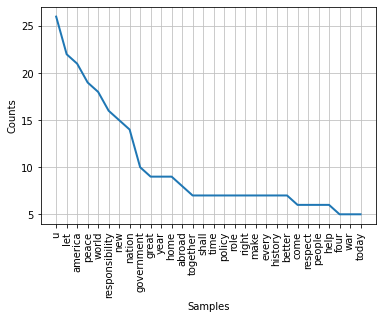

In [278]:
## Plotting the top 30 words occuring frequently
nltk.FreqDist(texts3).plot(30);

Dispersion plot

## Lexical dispersion is a measure of how frequently a word appears across the parts of a corpus.


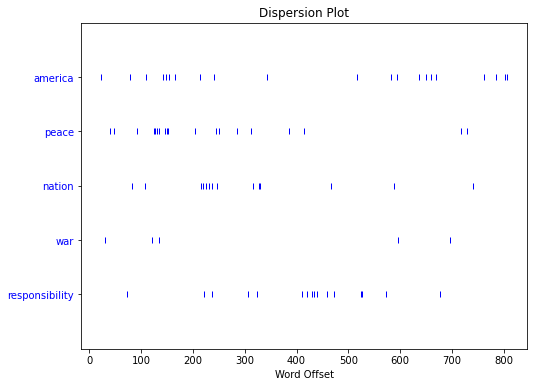

In [279]:
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot
plt.figure(figsize=(8, 6))
words_used=["america","peace","nation", "war",'responsibility']
dispersion_plot(texts3, words_used, ignore_case=True, title='Dispersion Plot')

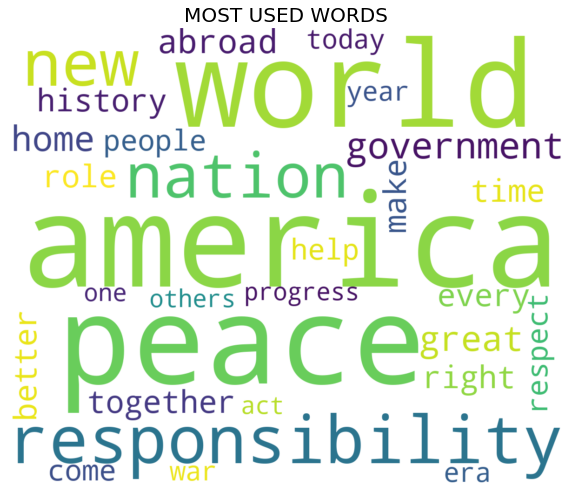

In [280]:
## Creating WordCloud
from wordcloud import WordCloud, STOPWORDS

new_words3 = set(STOPWORDS)
new_words3.update(['u','know', 'must','three','let'])

plt.subplots(figsize=(10,10))
wordcloud3 = WordCloud(background_color='white',max_words=30,
                            width=1200,stopwords=new_words3,
                            height=1000).generate(" ".join(texts3))

plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
END.